# Image Tagging System

## Load Libraries

In [1]:
import os
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

## Collection and Preparation

### Load Dataset

In [2]:
# Specify the dataset directory
image_dir = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'

# List files in the directory
image_files = os.listdir(image_dir)

# Display a few image file names
print(image_files[:5])

['valid', 'train']


### Check for corrupt and irrelevant images

In [3]:
image_dir2 = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
image_files2 = os.listdir(image_dir2)
print(image_files2)

['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Apple___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___Leaf_Mold', 'Tomato__

In [4]:
def check_images(image_folder):
    seen = set()
    for filename in os.listdir(image_folder):
        # Duplicates
        if filename in seen:
            print(f"Duplicate filename: {filename}")
        else:
            seen.add(filename)
            
        # Corrupted Images
        file_path = os.path.join(image_folder, filename)
        try:
            img = Image.open(file_path)
            img.verify()  # Verifies image integrity
        except (IOError, SyntaxError) as e:
            print(f"Corrupt image detected: {file_path}")

In [ ]:
for i in image_files2:
    print("Checking Class " + i)
    check_images(image_dir + '/train/' + i)
    print("Finished checking class " + i)
    print()

Checking Class Tomato___Late_blight
Finished checking class Tomato___Late_blight

Checking Class Tomato___healthy
Finished checking class Tomato___healthy

Checking Class Grape___healthy
Finished checking class Grape___healthy

Checking Class Orange___Haunglongbing_(Citrus_greening)
Finished checking class Orange___Haunglongbing_(Citrus_greening)

Checking Class Soybean___healthy
Finished checking class Soybean___healthy

Checking Class Squash___Powdery_mildew
Finished checking class Squash___Powdery_mildew

Checking Class Potato___healthy
Finished checking class Potato___healthy

Checking Class Corn_(maize)___Northern_Leaf_Blight
Finished checking class Corn_(maize)___Northern_Leaf_Blight

Checking Class Tomato___Early_blight
Finished checking class Tomato___Early_blight

Checking Class Tomato___Septoria_leaf_spot
Finished checking class Tomato___Septoria_leaf_spot

Checking Class Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Finished checking class Corn_(maize)___Cercospora_leaf

### Classes Balance Check

In [5]:
classes = []
for i in image_files2:
    image_files3 = os.listdir(image_dir2 + '/' + i)
    classes_images = len(image_files3)
    classes.append(classes_images)

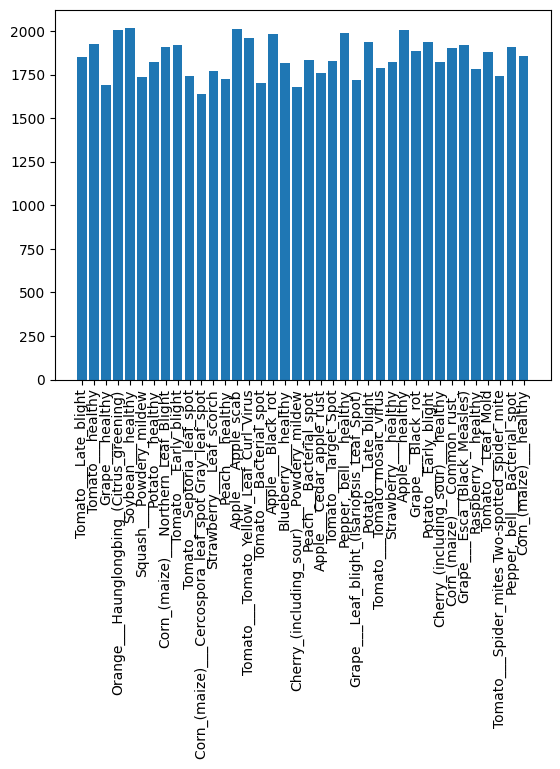

In [6]:
plt.bar(image_files2, classes)
plt.xticks(rotation = 90)
plt.show()

#### Data is Balanced.

### Training Image Preprocessing

In [7]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [8]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


# MLflow

In [9]:
!pip install mlflow

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 59.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 78.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.6/565.6 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 12.4 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 4.2.4
    Uninstalling cachetools-4.2.4:
      Successfully uninstalled cachetools-4.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 24.8.3 requires cubinlinker, which is not installed.
cudf 24.8.3 requires cu

In [10]:
# Import MLflow
import mlflow
import mlflow.tensorflow

# Create new experiment
cnn_model_v0_id=mlflow.create_experiment("cnn model v1")

In [11]:
# Set the experiment to "Sklearn Model"
mlflow.set_experiment("cnn model v1")

mlflow.start_run()

# Set the new run name 
mlflow.set_tag("mlflow.runName", "using_10_epochs")

# Set Auto logging for Scikit-learn flavor 
mlflow.tensorflow.autolog()

## Building Model

In [12]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential

In [13]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [18]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [19]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [20]:
cnn.add(tf.keras.layers.Flatten())

In [21]:
cnn.add(tf.keras.layers.Dense(units = 1500, activation = 'relu'))

In [22]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

### output layer

In [23]:
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

## compiling Model

In [24]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [25]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [26]:
training_history = cnn.fit(x = training_set, validation_data = validation_set, epochs = 10)

Epoch 1/10


I0000 00:00:1729096726.619734     106 service.cc:145] XLA service 0x797e3c005710 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729096726.619797     106 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729096726.619803     106 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1729096739.086021     106 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 146s 59ms/step - accuracy: 0.4163 - loss: 2.0728 - val_accuracy: 0.8219 - val_loss: 0.5711
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 120s 55ms/step - accuracy: 0.8414 - loss: 0.5011 - val_accuracy: 0.9159 - val_loss: 0.2666
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 119s 54ms/step - accuracy: 0.9103 - loss: 0.2827 - val_accuracy: 0.9405 - val_loss: 0.1819
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 119s 54ms/step - accuracy: 0.9377 - loss: 0.1919 - val_accuracy: 0.9515 - val_loss: 0.1502
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 119s 54ms/step - accuracy: 0.9549 - loss: 0.1410 - val_accuracy: 0.9342 - val_loss: 0.2044
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 119s 54ms/step - accuracy: 0.9620 - loss: 0.1143 - val_accuracy: 0.9581 - val_loss: 0.1289
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 119s 54ms/step - accuracy: 0.9714 - loss: 0.0867 - val_accuracy: 0.9694 - val_loss: 0.0988
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 119s 54ms/step - accuracy: 0.9734 - lo

2024/10/16 16:59:02 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: tuple index out of range
2024/10/16 16:59:02 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2024/10/16 16:59:16 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpv2dzjyxe/model, flavor: tensorflow). Fall back to return ['tensorflow==2.16.1', 'cloudpickle==3.0.0']. Set logging level to DEBUG to see the full traceback. 
2024/10/16 16:59:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


## Model Metrics Report

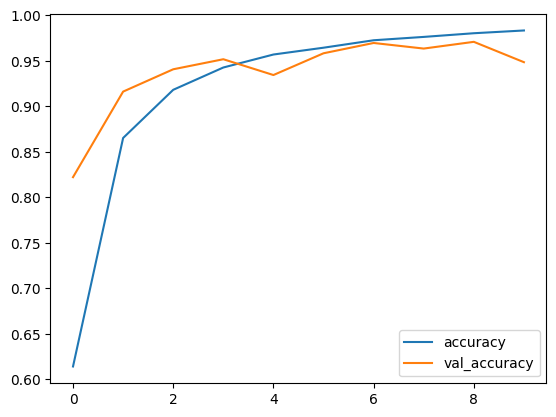

In [27]:
training_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']

plt.plot(training_acc, label='accuracy')
plt.plot(val_acc, label='val_accuracy')
plt.legend()

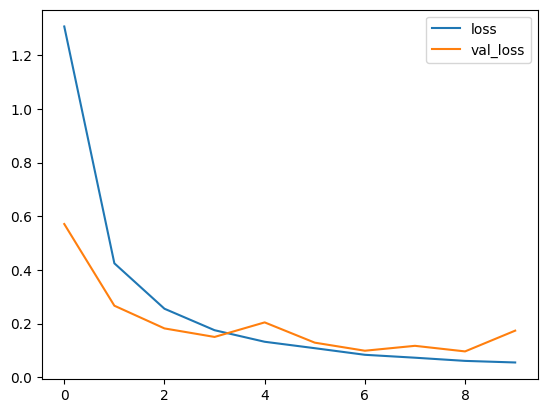

In [28]:
training_acc = training_history.history['loss']
val_acc = training_history.history['val_loss']

plt.plot(training_acc,label='loss')
plt.plot(val_acc,label='val_loss')
plt.legend()

In [29]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - accuracy: 0.9742 - loss: 0.0763
Training accuracy: 0.9756312966346741


In [30]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9478 - loss: 0.1788
Validation accuracy: 0.9482699632644653


## Extract model weights

In [35]:
cnn.save_weights('model.weights.h5')

In [36]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [37]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step


In [38]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [39]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [40]:
mid_point = cm.shape[0] // 2

cm_top_left = cm[:mid_point, :mid_point]
cm_bottom_right = cm[mid_point:, mid_point:]

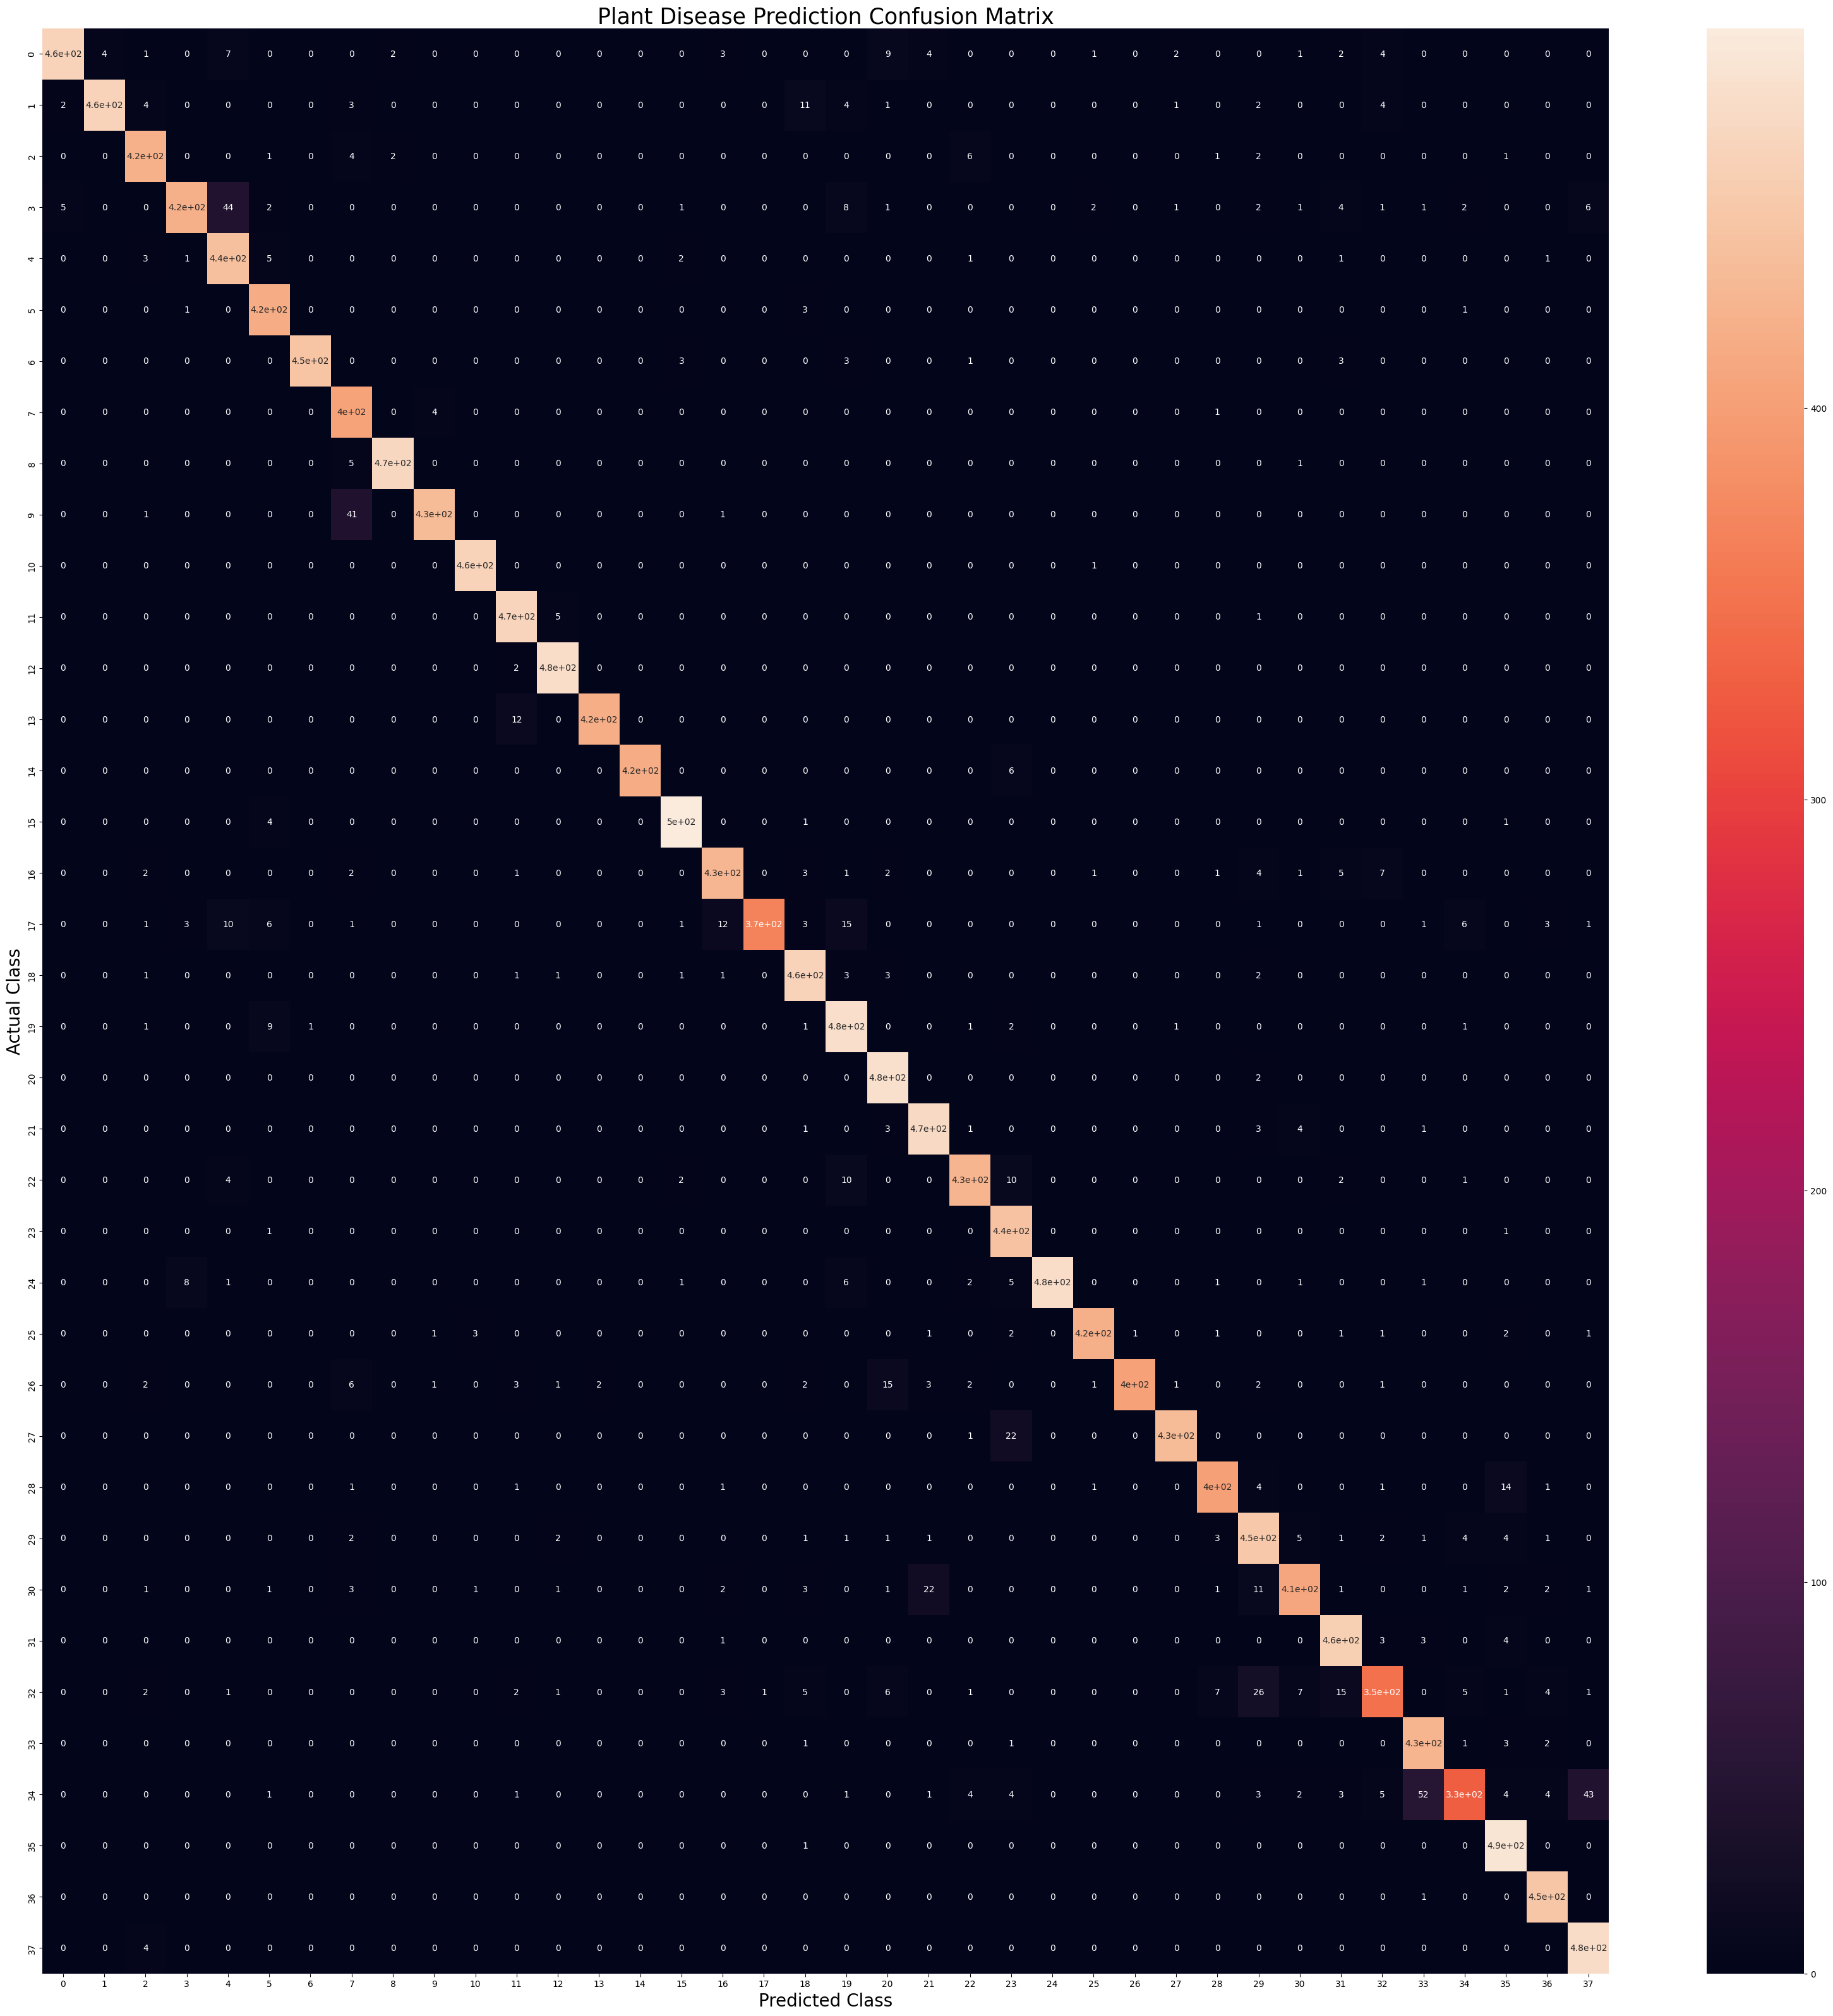

In [42]:
import seaborn as sns
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

# To run mlflow ui

In [53]:
get_ipython().system_raw("mlflow ui --port 5000 &")

[2024-10-16 17:10:05 +0000] [709] [INFO] Starting gunicorn 23.0.0
[2024-10-16 17:10:05 +0000] [709] [INFO] Listening at: http://127.0.0.1:5000 (709)
[2024-10-16 17:10:05 +0000] [709] [INFO] Using worker: sync
[2024-10-16 17:10:05 +0000] [710] [INFO] Booting worker with pid: 710
[2024-10-16 17:10:05 +0000] [711] [INFO] Booting worker with pid: 711
[2024-10-16 17:10:05 +0000] [712] [INFO] Booting worker with pid: 712
[2024-10-16 17:10:05 +0000] [713] [INFO] Booting worker with pid: 713


## creating local server via ngrok accessed through dynamic URL

In [44]:
!pip install pyngrok 

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
[2024-10-16 17:06:16 +0000] [574] [INFO] Starting gunicorn 23.0.0
[2024-10-16 17:06:16 +0000] [574] [INFO] Listening at: http://127.0.0.1:5000 (574)
[2024-10-16 17:06:16 +0000] [574] [INFO] Using worker: sync
[2024-10-16 17:06:16 +0000] [575] [INFO] Booting worker with pid: 575
[2024-10-16 17:06:16 +0000] [576] [INFO] Booting worker with pid: 576
[2024-10-16 17:06:16 +0000] [577] [INFO] Booting worker with pid: 577
[2024-10-16 17:06:16 +0000] [578] [INFO] Booting worker with pid: 578


In [54]:

from pyngrok import ngrok

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = "2nUHbPL3Y2rR8ZahJuc407jCPLJ_3aoBAFaqnRyNXgnPvHtEH"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)


MLflow Tracking UI: https://a168-34-46-187-123.ngrok-free.app


## prevent ngrok from timing out

In [ ]:
import requests  
import time  

# MLflow Tracking UI link:
ngrok_url =  ngrok_tunnel.public_url 

while True:  
    try:  
        response = requests.get(ngrok_url)  
        print(f"Keep-alive request sent. Status code: {response.status_code}")  
    except requests.exceptions.RequestException as e:  
        print(f"Error: {e}")  
    
    # Wait for 5 minutes (300 seconds) before sending the next request  
    time.sleep(300)  

Keep-alive request sent. Status code: 200
Keep-alive request sent. Status code: 200


[2024-10-16 17:15:47 +0000] [709] [INFO] Handling signal: int


KeyboardInterrupt: 